# COVID 19 ICU PREDICTION ANALYSIS ON BRAZILIAN HOSPITAL DATA

# Importing the necessary libraries

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots 
%matplotlib inline

# Importing the dataset 

In [247]:
file_path = r"C:\Users\salsa\OneDrive\Desktop\Kaggle_Sirio_Libanes_ICU_Prediction.xlsx"
data = pd.read_excel(file_path)

In [248]:
#showing first 5 rows of the datset
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


# Showing datatypes

In [249]:
data_type_counts = data.dtypes.value_counts()

# Print the counts of each data type
print(data_type_counts)

float64    225
int64        4
object       2
dtype: int64


# Show data that are objects

In [250]:

data.select_dtypes(object)
     

,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12
...,...,...
1920,50th,0-2
1921,50th,2-4
1922,50th,4-6
1923,50th,6-12


# converting objects to floats

In [251]:
#converting objects to floats
colums_to_convert = data.select_dtypes(object).columns   #finding columns that are not of type float or int
colums_to_convert
data = pd.get_dummies(data, columns = colums_to_convert)      #performing hotcoding
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [252]:
data.tail()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
1920,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1922,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1923,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1924,384,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 244 entries, PATIENT_VISIT_IDENTIFIER to WINDOW_ABOVE_12
dtypes: float64(225), int64(4), uint8(15)
memory usage: 3.4 MB


# Data Visualization

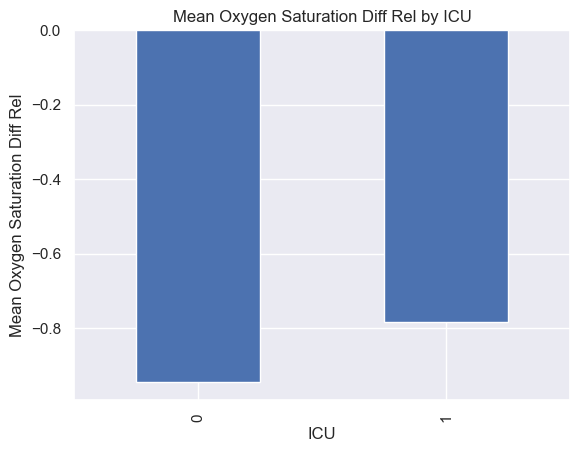

In [169]:
import matplotlib.pyplot as plt

data.groupby('ICU')['OXYGEN_SATURATION_DIFF_REL'].mean().plot(kind='bar')
plt.xlabel('ICU')
plt.ylabel('Mean Oxygen Saturation Diff Rel')
plt.title('Mean Oxygen Saturation Diff Rel by ICU')
plt.show()

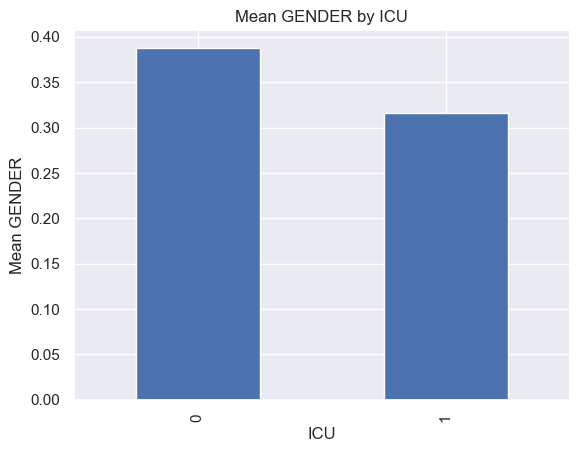

In [170]:
data.groupby('ICU')['GENDER'].mean().plot(kind='bar')
plt.xlabel('ICU')
plt.ylabel('Mean GENDER')
plt.title('Mean GENDER by ICU')
plt.show()

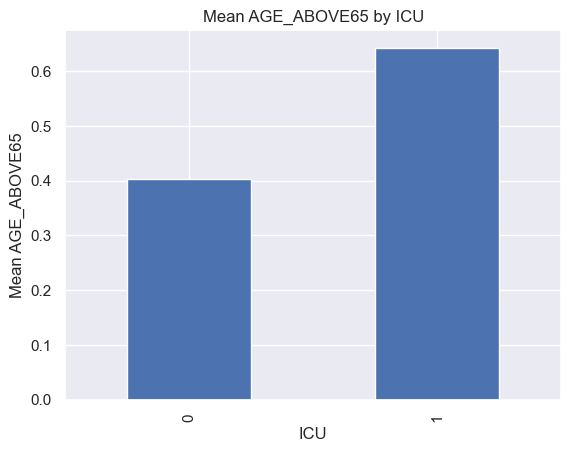

In [171]:
data.groupby('ICU')['AGE_ABOVE65'].mean().plot(kind='bar')
plt.xlabel('ICU')
plt.ylabel('Mean AGE_ABOVE65')
plt.title('Mean AGE_ABOVE65 by ICU')
plt.show()

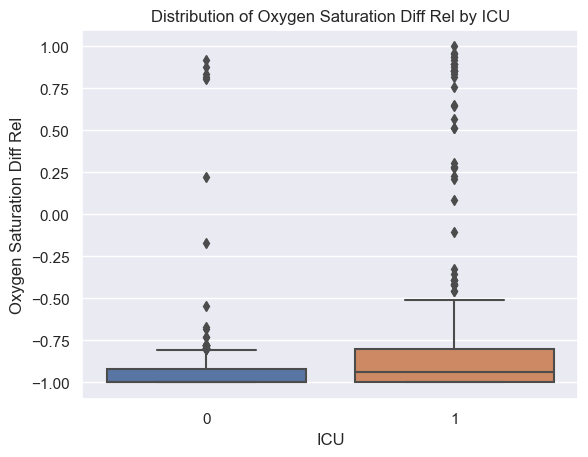

In [172]:
#data.groupby('ICU')['OXYGEN_SATURATION_DIFF_REL'].mean().plot(kind='box')
sns.boxplot(x='ICU', y='OXYGEN_SATURATION_DIFF_REL', data=data)
plt.xlabel('ICU')
plt.ylabel('Oxygen Saturation Diff Rel')
plt.title('Distribution of Oxygen Saturation Diff Rel by ICU')
plt.show()


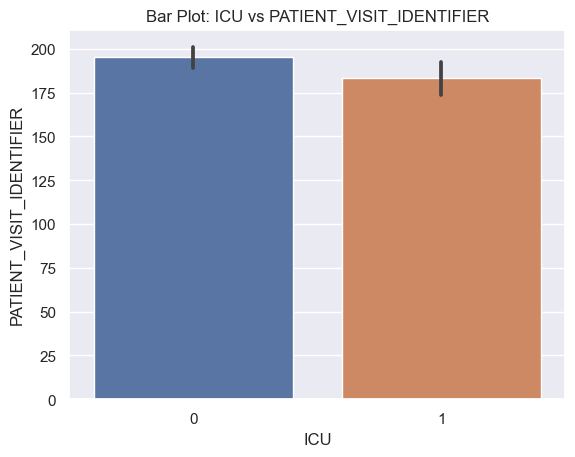

In [174]:
sns.barplot(x='ICU', y='PATIENT_VISIT_IDENTIFIER', data=data)
plt.xlabel('ICU')
plt.ylabel('PATIENT_VISIT_IDENTIFIER')
plt.title('Bar Plot: ICU vs PATIENT_VISIT_IDENTIFIER')
plt.show()

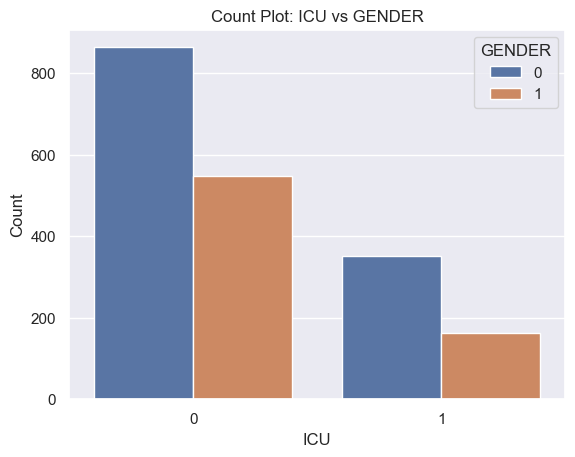

In [237]:
sns.countplot(x='ICU', hue='GENDER', data=data)
plt.xlabel('ICU')
plt.ylabel('Count')
plt.title('Count Plot: ICU vs GENDER')
plt.legend(title='GENDER')
plt.show()


<AxesSubplot:xlabel='PATIENT_VISIT_IDENTIFIER', ylabel='BLOODPRESSURE_DIASTOLIC_MEAN'>

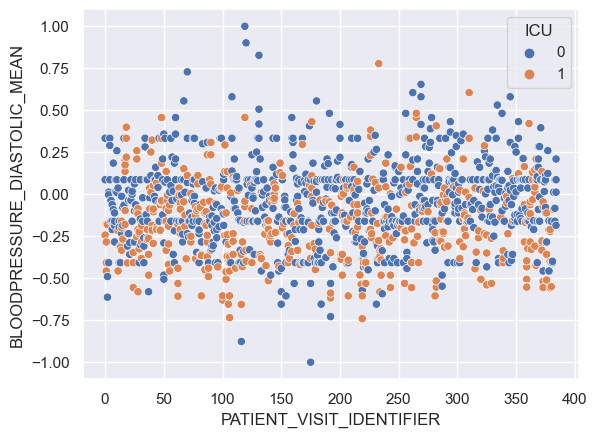

In [175]:
#data.plot(kind='scatter', x='PATIENT_VISIT_IDENTIFIER', y='BLOODPRESSURE_DIASTOLIC_MEAN')
sns.scatterplot( x='PATIENT_VISIT_IDENTIFIER', y='BLOODPRESSURE_DIASTOLIC_MEAN', hue ='ICU', data = data)

<AxesSubplot:xlabel='PATIENT_VISIT_IDENTIFIER', ylabel='OXYGEN_SATURATION_DIFF_REL'>

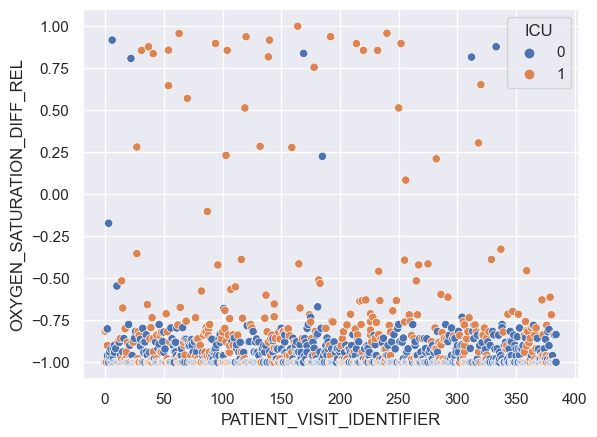

In [176]:
sns.scatterplot( y='OXYGEN_SATURATION_DIFF_REL', x='PATIENT_VISIT_IDENTIFIER', hue ='ICU', data = data)

## handling missing values

In [177]:
#misiing values
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent] , axis = 1 , keys = ['Total', 'percent'] )
missing_data.tail(40)

,Total,percent
BLOODPRESSURE_DIASTOLIC_MAX,685,0.355844
HEART_RATE_MEAN,685,0.355844
HEART_RATE_DIFF_REL,685,0.355844
BLOODPRESSURE_SISTOLIC_DIFF_REL,685,0.355844
HEART_RATE_MIN,685,0.355844
BLOODPRESSURE_SISTOLIC_MIN,685,0.355844
BLOODPRESSURE_DIASTOLIC_MIN,685,0.355844
BLOODPRESSURE_DIASTOLIC_MEAN,685,0.355844
BLOODPRESSURE_DIASTOLIC_DIFF_REL,685,0.355844
HEART_RATE_DIFF,685,0.355844


In [178]:
#data = data.drop((missing_data[missing_data['Total'] >6]).index, 1)
#data = data.drop(data.loc[data ['IMMUNOCOMPROMISED'].isnull()].index)
data.isnull().sum().max()
missing_values_count = data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

print(missing_values_count)


DISEASE GROUPING 1                   5
DISEASE GROUPING 2                   5
DISEASE GROUPING 3                   5
DISEASE GROUPING 4                   5
DISEASE GROUPING 5                   5
                                  ... 
BLOODPRESSURE_SISTOLIC_DIFF_REL    685
HEART_RATE_DIFF_REL                685
RESPIRATORY_RATE_DIFF_REL          748
TEMPERATURE_DIFF_REL               694
OXYGEN_SATURATION_DIFF_REL         686
Length: 225, dtype: int64


In [179]:
 # Select numeric columns
numeric_columns = data.select_dtypes(include='number')
data[numeric_columns.columns] = data[numeric_columns.columns].fillna(data[numeric_columns.columns].mean())


In [180]:
data.isnull().sum().max()

0

In [181]:
data.columns.tolist()


['PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_DIFF',
 'CREATININ

## Count the number of patients

In [182]:

num_patients = len(data)
# Print the number of patients
print("Number of Patients in the Dataset:", num_patients)


Number of Patients in the Dataset: 1925


In [183]:
Non_ICU_Admitted_data = data[data['ICU']==0]
ICU_Admitted_data = data[data['ICU']==1]

## making a histogram of the ICU and Non ICU admitted patiens

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       0
1       0
2       0
3       0
10      0
       ..
1920    0
1921    0
1922    0
1923    0
1924    0
Name: ICU, Length: 1410, dtype: int64>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 4       1
5       1
6       1
7       1
8       1
       ..
1897    1
1898    1
1899    1
1904    1
1914    1
Name: ICU, Length: 515, dtype: int64>


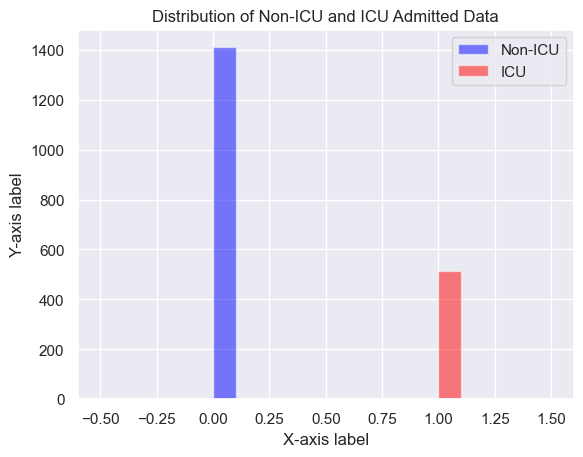

In [241]:
# Plotting Non-ICU Admitted Data
plt.hist(Non_ICU_Admitted_data['ICU'], bins=10, color='blue', alpha=0.5, label='Non-ICU')
print(Non_ICU_Admitted_data['ICU'].sum)

# Plotting ICU Admitted Data
plt.hist(ICU_Admitted_data['ICU'], bins=10, color='red', alpha=0.5, label='ICU')
print(ICU_Admitted_data['ICU'].sum)
# Add labels and title to the plot
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Distribution of Non-ICU and ICU Admitted Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## creating subsets of ICU and Non ICU patients based on Vitals, Labs and Demographics

In [185]:
Vital_Non_ICU_Admitted_data = Non_ICU_Admitted_data[['BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']]
Vital_Non_ICU_Admitted_data.columns

Index(['BLOODPRESSURE_DIASTOLIC_MEAN', 'RESPIRATORY_RATE_MEAN',
       'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN', 'HEART_RATE_DIFF',
       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF'],
      dtype='object')

In [186]:
Vital_ICU_Admitted_data = ICU_Admitted_data[['BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']]


                                   ICU  BLOODPRESSURE_DIASTOLIC_MEAN  \
ICU                           1.000000                     -0.214945   
BLOODPRESSURE_DIASTOLIC_MEAN -0.214945                      1.000000   
RESPIRATORY_RATE_MEAN         0.367045                     -0.100685   
TEMPERATURE_MEAN             -0.094318                      0.013078   
OXYGEN_SATURATION_MEAN        0.004915                     -0.039565   
BLOODPRESSURE_SISTOLIC_MIN   -0.144749                      0.486959   
HEART_RATE_MIN               -0.176754                      0.151130   
RESPIRATORY_RATE_MIN         -0.046090                      0.019753   
TEMPERATURE_MEAN             -0.094318                      0.013078   
BLOODPRESSURE_DIASTOLIC_MEAN -0.214945                      1.000000   
BLOODPRESSURE_SISTOLIC_MEAN   0.128640                      0.504155   
HEART_RATE_MEAN              -0.001131                      0.123960   
HEART_RATE_DIFF               0.292816                     -0.08

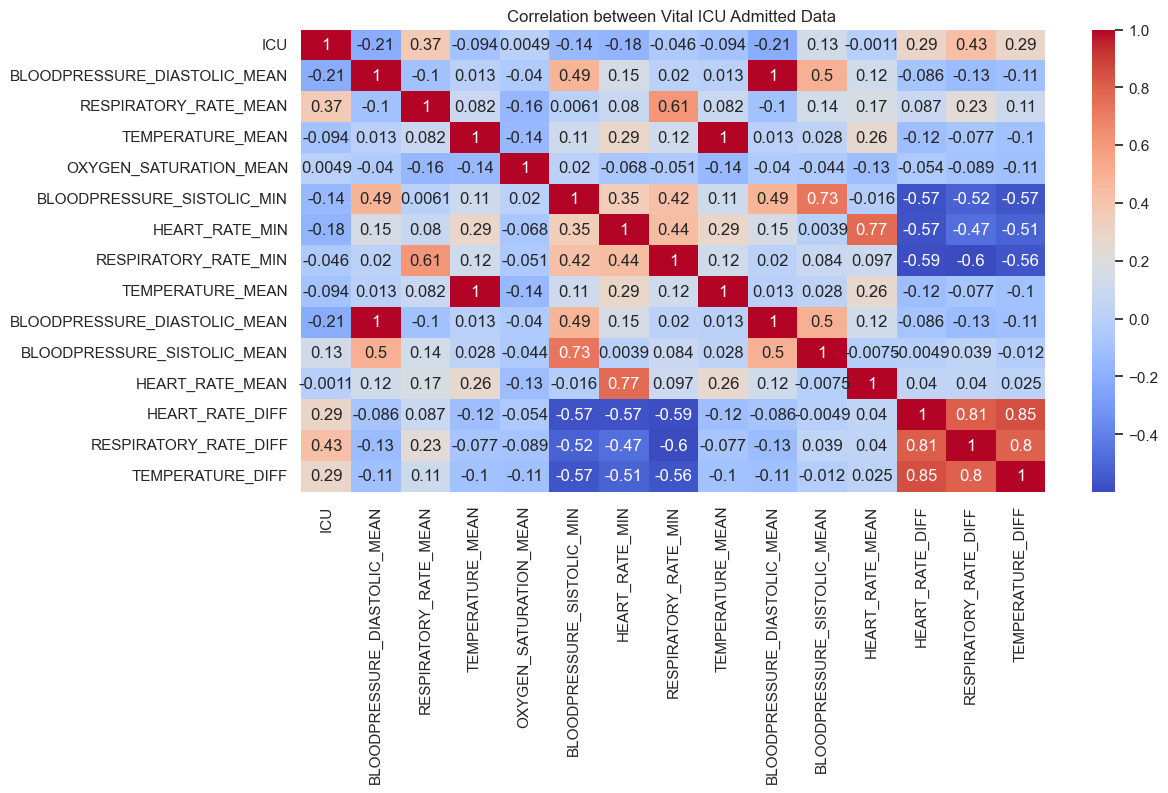

In [187]:
columns = ['ICU', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']

# Subset the data with the selected columns
subset_data = data[columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Display the correlation matrix
print(correlation_matrix)
# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Vital ICU Admitted Data ')
plt.show()

## feature importance ranking of vitals

Feature rankings:
1. RESPIRATORY_RATE_DIFF (0.27077897964322006)
2. RESPIRATORY_RATE_MEAN (0.12401557289303983)
3. RESPIRATORY_RATE_MIN (0.11032524804907777)
4. BLOODPRESSURE_DIASTOLIC_MEAN (0.06434173439064059)
5. BLOODPRESSURE_SISTOLIC_MEAN (0.06116523635996806)
6. BLOODPRESSURE_DIASTOLIC_MEAN (0.05968903144813882)
7. BLOODPRESSURE_SISTOLIC_MIN (0.04690667431587807)
8. HEART_RATE_DIFF (0.04322242576034076)
9. OXYGEN_SATURATION_MEAN (0.0387469215876424)
10. TEMPERATURE_DIFF (0.03841393503864801)
11. TEMPERATURE_MEAN (0.03715736846006532)
12. TEMPERATURE_MEAN (0.037141448793773076)
13. HEART_RATE_MIN (0.03519033118695876)
14. HEART_RATE_MEAN (0.03290509207260846)


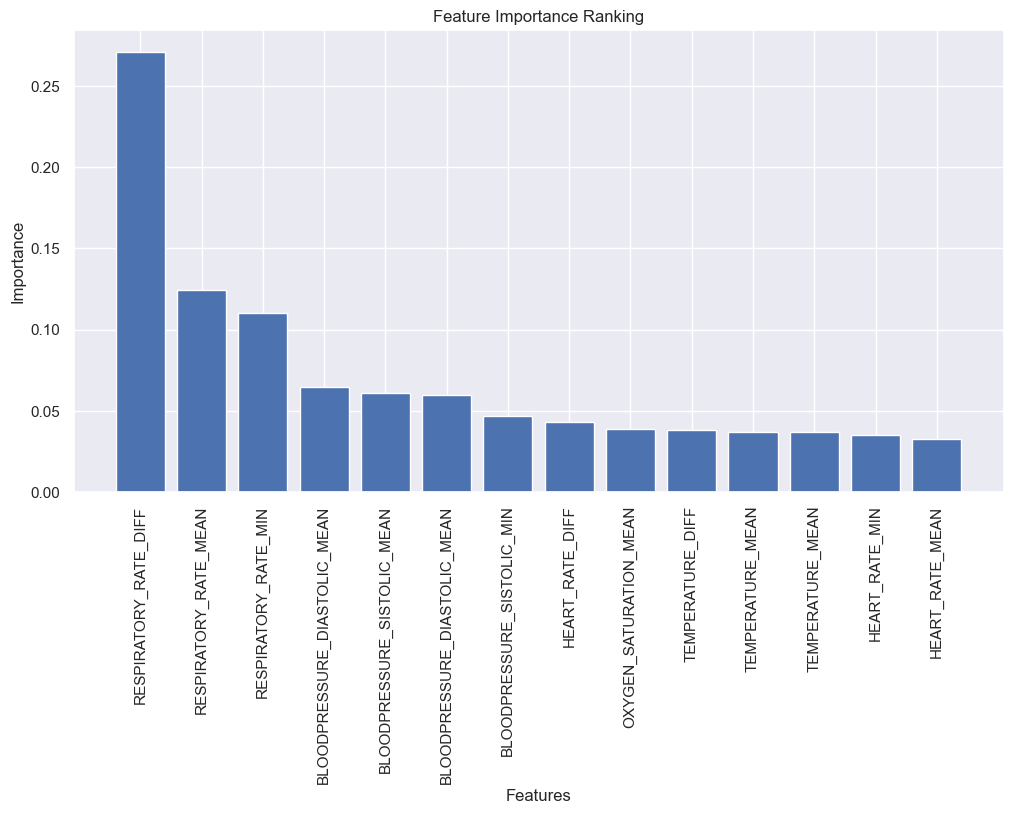

In [188]:
from sklearn.ensemble import ExtraTreesRegressor
# Separate the features (X) and target variable (y)
X = subset_data.drop('ICU', axis=1)
y = subset_data['ICU']

# Create an instance of the ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Sort the features based on their importance scores
sorted_indices = importances.argsort()[::-1]

# Print the feature rankings
print("Feature rankings:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {X.columns[idx]} ({importances[idx]})")

# Visualize the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Ranking")
plt.show()




In [189]:
Lab_Non_ICU_Admitted_data = Non_ICU_Admitted_data[['HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN']]
Lab_ICU_Admitted_data = ICU_Admitted_data[['HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN']]


In [190]:
data.columns.tolist()

['PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_DIFF',
 'CREATININ

In [191]:
Demographics_Non_ICU_Admitted_data = Non_ICU_Admitted_data[['AGE_ABOVE65','AGE_PERCENTIL_10th','AGE_PERCENTIL_20th',
                            'AGE_PERCENTIL_30th','AGE_PERCENTIL_40th','AGE_PERCENTIL_50th','AGE_PERCENTIL_60th',
                            'AGE_PERCENTIL_70th','AGE_PERCENTIL_80th','AGE_PERCENTIL_90th','GENDER','DISEASE GROUPING 1',
                            'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4','DISEASE GROUPING 5',
                            'DISEASE GROUPING 6', 'IMMUNOCOMPROMISED','WINDOW_0-2','WINDOW_2-4','WINDOW_4-6','WINDOW_6-12',
                                                            'WINDOW_ABOVE_12']]
Demographics_ICU_Admitted_data = ICU_Admitted_data[['AGE_ABOVE65','AGE_PERCENTIL_10th','AGE_PERCENTIL_20th',
                            'AGE_PERCENTIL_30th','AGE_PERCENTIL_40th','AGE_PERCENTIL_50th','AGE_PERCENTIL_60th',
                            'AGE_PERCENTIL_70th','AGE_PERCENTIL_80th','AGE_PERCENTIL_90th','GENDER','DISEASE GROUPING 1',
                            'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4','DISEASE GROUPING 5',
                            'DISEASE GROUPING 6', 'IMMUNOCOMPROMISED','WINDOW_0-2','WINDOW_2-4','WINDOW_4-6','WINDOW_6-12',
                                                            'WINDOW_ABOVE_12']]

                         ICU   AGE_ABOVE65  AGE_PERCENTIL_10th  \
ICU                 1.000000  2.121978e-01       -1.097322e-01   
AGE_ABOVE65         0.212198  1.000000e+00       -3.234983e-01   
AGE_PERCENTIL_10th -0.109732 -3.234983e-01        1.000000e+00   
AGE_PERCENTIL_20th -0.106253 -3.322619e-01       -1.224148e-01   
AGE_PERCENTIL_30th -0.037450 -3.234983e-01       -1.191860e-01   
AGE_PERCENTIL_40th -0.075022 -3.190654e-01       -1.175528e-01   
AGE_PERCENTIL_50th -0.022943 -3.100890e-01       -1.142457e-01   
AGE_PERCENTIL_60th  0.029888  3.126527e-01       -1.125703e-01   
AGE_PERCENTIL_70th  0.061573  3.582902e-01       -1.159063e-01   
AGE_PERCENTIL_80th  0.043944  3.531569e-01       -1.142457e-01   
AGE_PERCENTIL_90th  0.092866  3.158056e-01       -1.021626e-01   
GENDER             -0.065543  4.974367e-02       -7.193802e-02   
DISEASE GROUPING 1  0.061278  2.666652e-01       -5.787220e-02   
DISEASE GROUPING 2  0.081844  6.739167e-02       -5.737130e-02   
DISEASE GR

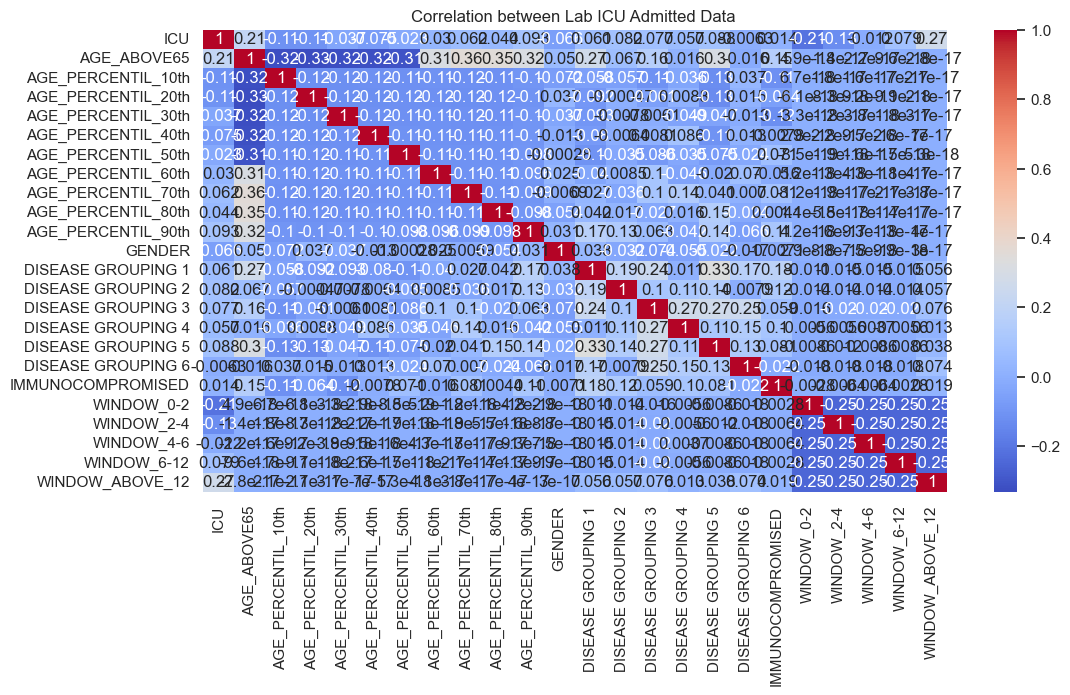

In [192]:
columns = ['ICU','AGE_ABOVE65','AGE_PERCENTIL_10th','AGE_PERCENTIL_20th',
                            'AGE_PERCENTIL_30th','AGE_PERCENTIL_40th','AGE_PERCENTIL_50th','AGE_PERCENTIL_60th',
                            'AGE_PERCENTIL_70th','AGE_PERCENTIL_80th','AGE_PERCENTIL_90th','GENDER','DISEASE GROUPING 1',
                            'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4','DISEASE GROUPING 5',
                            'DISEASE GROUPING 6', 'IMMUNOCOMPROMISED','WINDOW_0-2','WINDOW_2-4','WINDOW_4-6','WINDOW_6-12',
                                                            'WINDOW_ABOVE_12']

# Subset the data with the selected columns
subset_data = data[columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Display the correlation matrix
print(correlation_matrix)
# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Lab ICU Admitted Data ')
plt.show()

## feature importance ranking of demographics

Feature rankings:
1. RESPIRATORY_RATE_DIFF (0.25544587876216834)
2. RESPIRATORY_RATE_MEAN (0.13502369044191945)
3. RESPIRATORY_RATE_MIN (0.11365473363175624)
4. BLOODPRESSURE_DIASTOLIC_MEAN (0.06256154218721029)
5. BLOODPRESSURE_DIASTOLIC_MEAN (0.06161802345846084)
6. BLOODPRESSURE_SISTOLIC_MEAN (0.06141056506388024)
7. BLOODPRESSURE_SISTOLIC_MIN (0.05141062039192116)
8. HEART_RATE_DIFF (0.04454409239851991)
9. OXYGEN_SATURATION_MEAN (0.038075052311001396)
10. TEMPERATURE_MEAN (0.037643121000030914)
11. TEMPERATURE_MEAN (0.03628599030963928)
12. HEART_RATE_MIN (0.03442732306666339)
13. TEMPERATURE_DIFF (0.034348468021018146)
14. HEART_RATE_MEAN (0.033550898955810614)


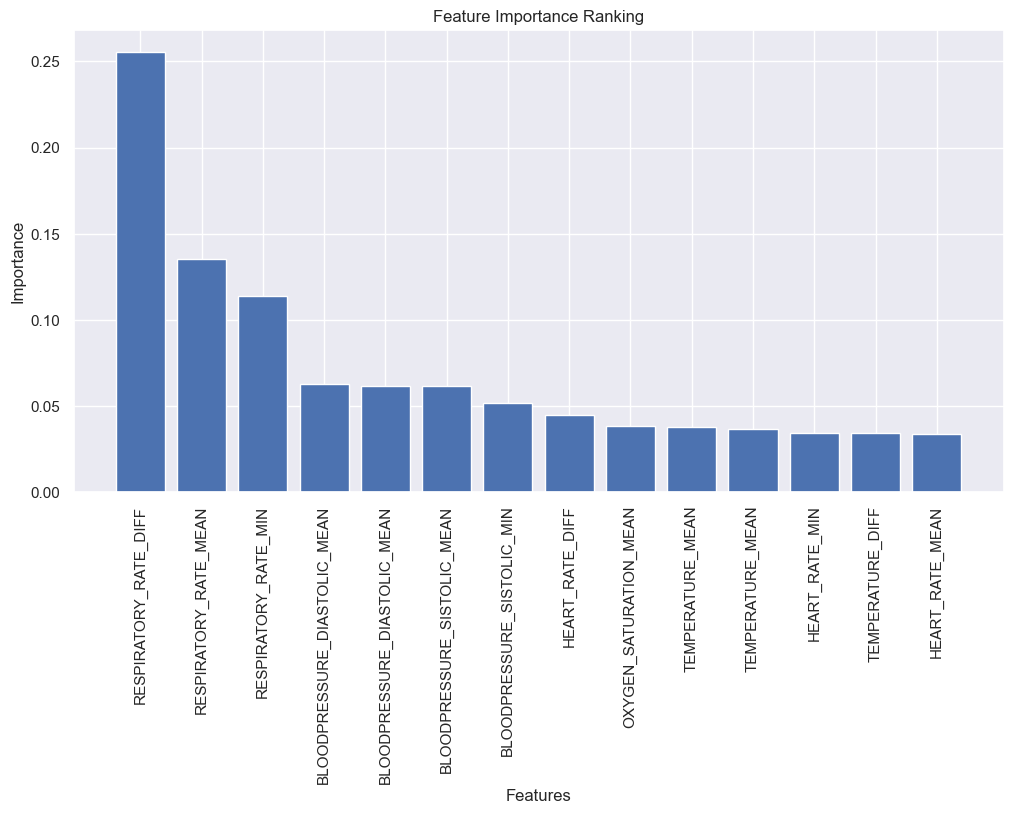

In [254]:
from sklearn.ensemble import ExtraTreesRegressor
# Separate the features (X) and target variable (y)
X = subset_data.drop('ICU', axis=1)
y = subset_data['ICU']

# Create an instance of the ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Sort the features based on their importance scores
sorted_indices = importances.argsort()[::-1]

# Print the feature rankings
print("Feature rankings:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {X.columns[idx]} ({importances[idx]})")

# Visualize the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Ranking")
plt.show()



In [194]:
subset_data.dtypes

ICU                     int64
AGE_ABOVE65             int64
AGE_PERCENTIL_10th      uint8
AGE_PERCENTIL_20th      uint8
AGE_PERCENTIL_30th      uint8
AGE_PERCENTIL_40th      uint8
AGE_PERCENTIL_50th      uint8
AGE_PERCENTIL_60th      uint8
AGE_PERCENTIL_70th      uint8
AGE_PERCENTIL_80th      uint8
AGE_PERCENTIL_90th      uint8
GENDER                  int64
DISEASE GROUPING 1    float64
DISEASE GROUPING 2    float64
DISEASE GROUPING 3    float64
DISEASE GROUPING 4    float64
DISEASE GROUPING 5    float64
DISEASE GROUPING 6    float64
IMMUNOCOMPROMISED     float64
WINDOW_0-2              uint8
WINDOW_2-4              uint8
WINDOW_4-6              uint8
WINDOW_6-12             uint8
WINDOW_ABOVE_12         uint8
dtype: object

## heatmaps to show correlation between Lab features

                        ICU       HTN  BIC_VENOUS_MEAN  CALCIUM_MEAN  \
ICU                1.000000  0.170166         0.063582     -0.061055   
HTN                0.170166  1.000000         0.027621      0.000625   
BIC_VENOUS_MEAN    0.063582  0.027621         1.000000     -0.010808   
CALCIUM_MEAN      -0.061055  0.000625        -0.010808      1.000000   
CREATININ_MEAN     0.076098  0.078234        -0.150168     -0.137510   
GLUCOSE_MEAN      -0.008443  0.078096        -0.036343     -0.040472   
INR_MEAN           0.075171  0.029033        -0.105024     -0.114184   
LACTATE_MEAN      -0.339442 -0.075987        -0.124440      0.162111   
LEUKOCYTES_MEAN    0.202168  0.062031        -0.004131     -0.066713   
LINFOCITOS_MEAN    0.044473 -0.006099         0.034339      0.151173   
NEUTROPHILES_MEAN  0.187298  0.058241        -0.011303     -0.106025   
PC02_VENOUS_MEAN   0.074872  0.079906         0.614556     -0.044094   
PCR_MEAN           0.018096  0.001196        -0.092843     -0.17

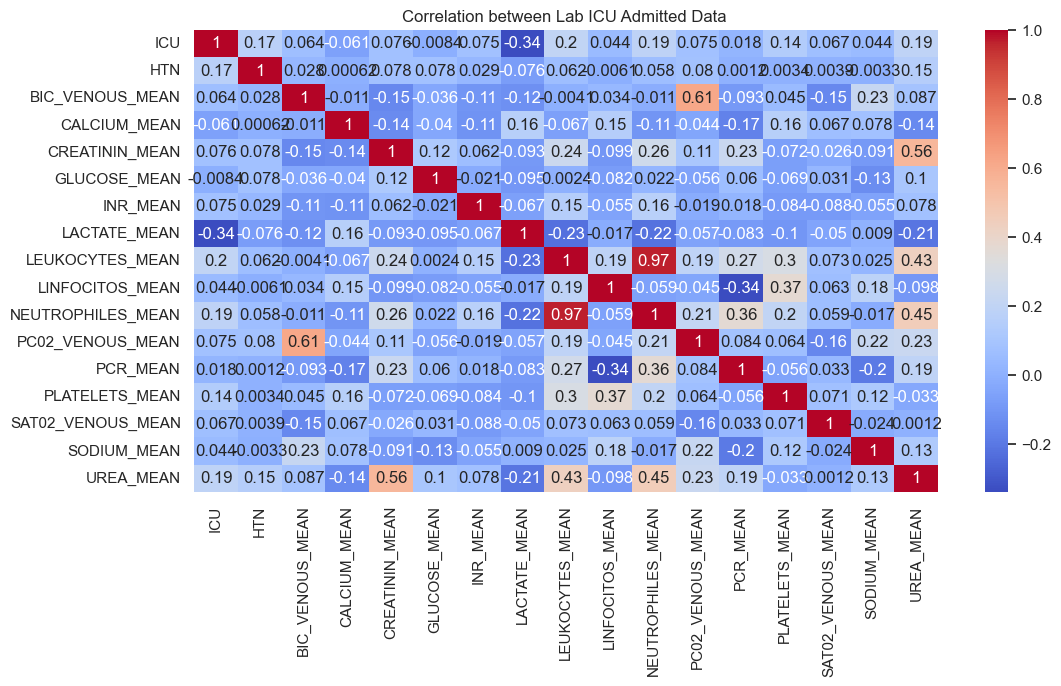

In [195]:
columns = ['ICU', 'HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN']

# Subset the data with the selected columns
subset_data = data[columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Display the correlation matrix
print(correlation_matrix)
# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Lab ICU Admitted Data ')
plt.show()

## feature importance ranking of Lab data

Feature rankings:
1. LACTATE_MEAN (0.26936196341666724)
2. PLATELETS_MEAN (0.07485483566163828)
3. SAT02_VENOUS_MEAN (0.06376914494196356)
4. UREA_MEAN (0.06110512310826643)
5. PCR_MEAN (0.05535031076669977)
6. LEUKOCYTES_MEAN (0.049457413185156375)
7. CALCIUM_MEAN (0.049104978782870096)
8. NEUTROPHILES_MEAN (0.04856211851881748)
9. INR_MEAN (0.046962708208898085)
10. SODIUM_MEAN (0.045442547948586084)
11. LINFOCITOS_MEAN (0.045253585792272816)
12. HTN (0.0415959249598663)
13. CREATININ_MEAN (0.04155083026914721)
14. PC02_VENOUS_MEAN (0.03934108344399027)
15. GLUCOSE_MEAN (0.03689973372186445)
16. BIC_VENOUS_MEAN (0.031387697273295656)


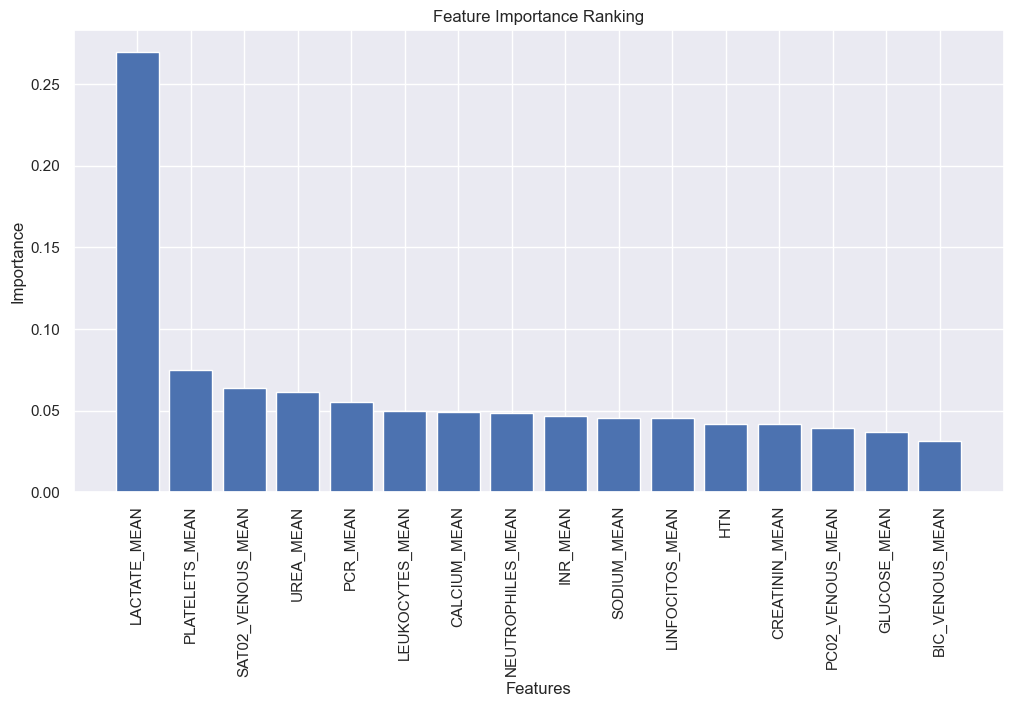

In [196]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Separate the features (X) and target variable (y)
X = subset_data.drop('ICU', axis=1)
y = subset_data['ICU']

# Create an instance of the ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Sort the features based on their importance scores
sorted_indices = importances.argsort()[::-1]

# Print the feature rankings
print("Feature rankings:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {X.columns[idx]} ({importances[idx]})")

# Visualize the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Ranking")
plt.show()




## visualizing the relationship between lab data and ICU patients

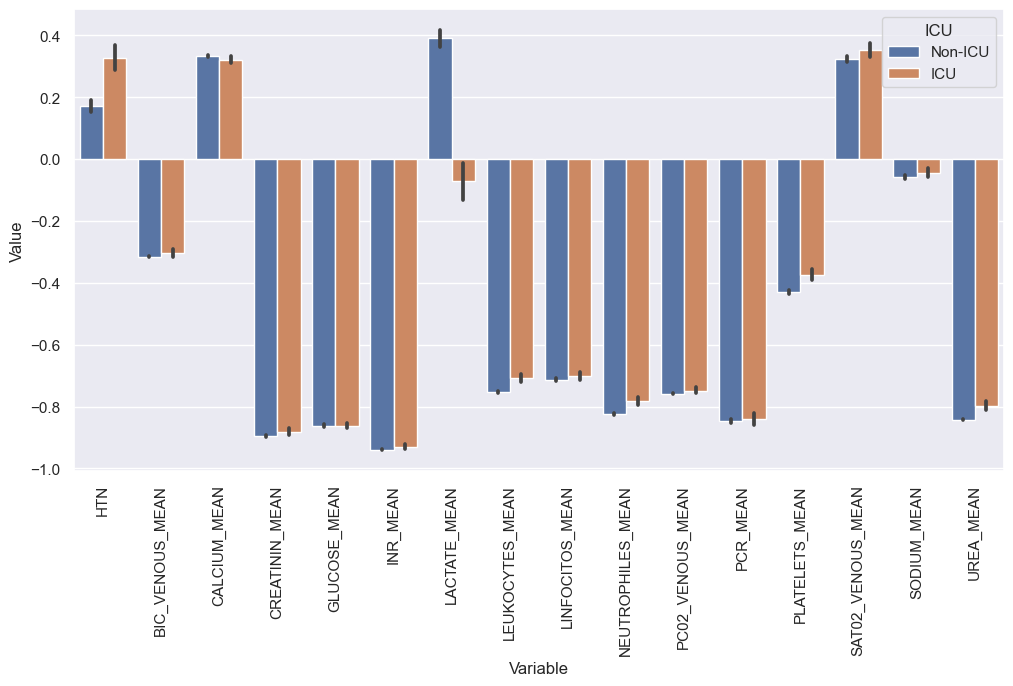

In [197]:
# Concatenate the non-ICU and ICU dataframes
Lab_data = pd.concat([Lab_Non_ICU_Admitted_data, Lab_ICU_Admitted_data])

# Create a new column 'ICU' to indicate the ICU status
Lab_data['ICU'] = ['Non-ICU'] * len(Lab_Non_ICU_Admitted_data) + ['ICU'] * len(Lab_ICU_Admitted_data)

# Reshape the data to long format
Lab_data = pd.melt(Lab_data, id_vars='ICU', var_name='Variable', value_name='Value')

# Create the bar plot
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.barplot(data=Lab_data, x='Variable', y='Value', hue='ICU')
plt.xticks(rotation=90)
plt.show()


## heatmap to show correlation between vitals and ICU patients

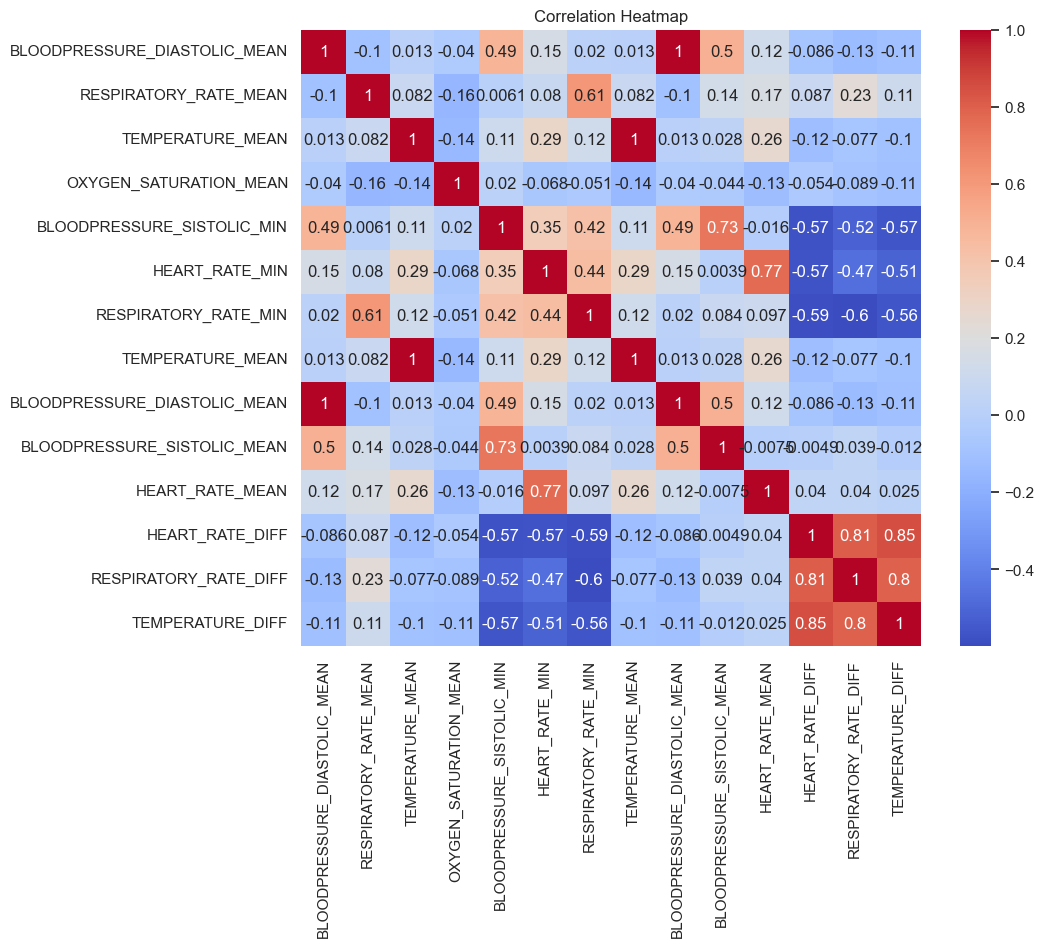

In [198]:
# Assuming you have a DataFrame called 'data' with numeric features and ICU column
# Concatenate the ICU and non-ICU data
combined_data = pd.concat([Vital_ICU_Admitted_data, Vital_Non_ICU_Admitted_data])

# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


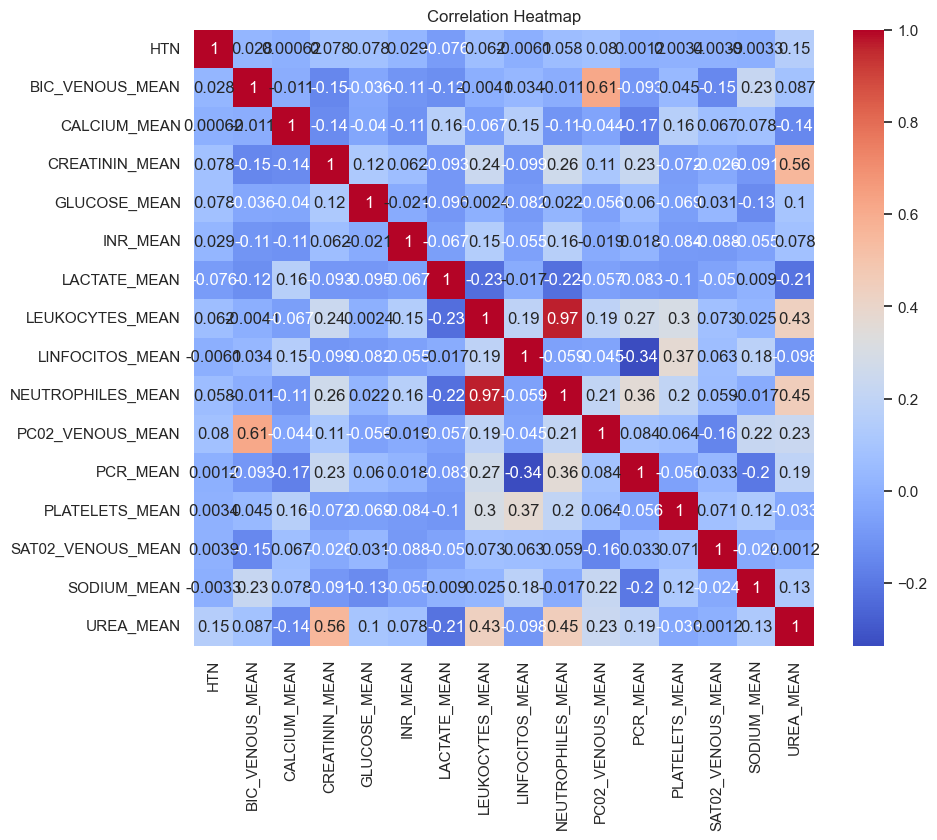

In [199]:
# Assuming you have a DataFrame called 'data' with numeric features and ICU column
# Concatenate the ICU and non-ICU data
combined_data_lab = pd.concat([Lab_ICU_Admitted_data, Lab_Non_ICU_Admitted_data])

# Compute the correlation matrix
correlation_matrix = combined_data_lab.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


                                   ICU  BLOODPRESSURE_DIASTOLIC_MEAN  \
ICU                           1.000000                     -0.214945   
BLOODPRESSURE_DIASTOLIC_MEAN -0.214945                      1.000000   
RESPIRATORY_RATE_MEAN         0.367045                     -0.100685   
TEMPERATURE_MEAN             -0.094318                      0.013078   
OXYGEN_SATURATION_MEAN        0.004915                     -0.039565   
BLOODPRESSURE_SISTOLIC_MIN   -0.144749                      0.486959   
HEART_RATE_MIN               -0.176754                      0.151130   
RESPIRATORY_RATE_MIN         -0.046090                      0.019753   
TEMPERATURE_MEAN             -0.094318                      0.013078   
BLOODPRESSURE_DIASTOLIC_MEAN -0.214945                      1.000000   
BLOODPRESSURE_SISTOLIC_MEAN   0.128640                      0.504155   
HEART_RATE_MEAN              -0.001131                      0.123960   
HEART_RATE_DIFF               0.292816                     -0.08

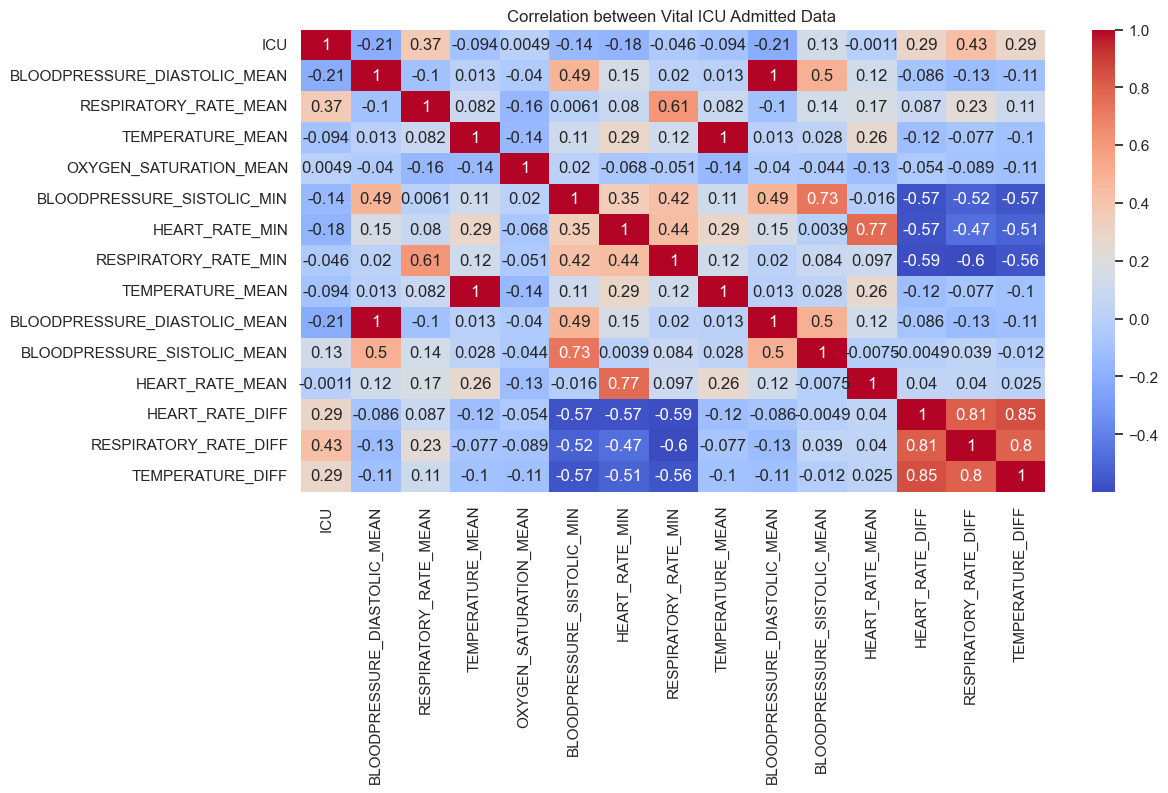

In [200]:
columns = ['ICU', 'BLOODPRESSURE_DIASTOLIC_MEAN', 'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN', 'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']

# Subset the data with the selected columns
subset_data = data[columns]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Display the correlation matrix
print(correlation_matrix)
# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Vital ICU Admitted Data ')
plt.show()

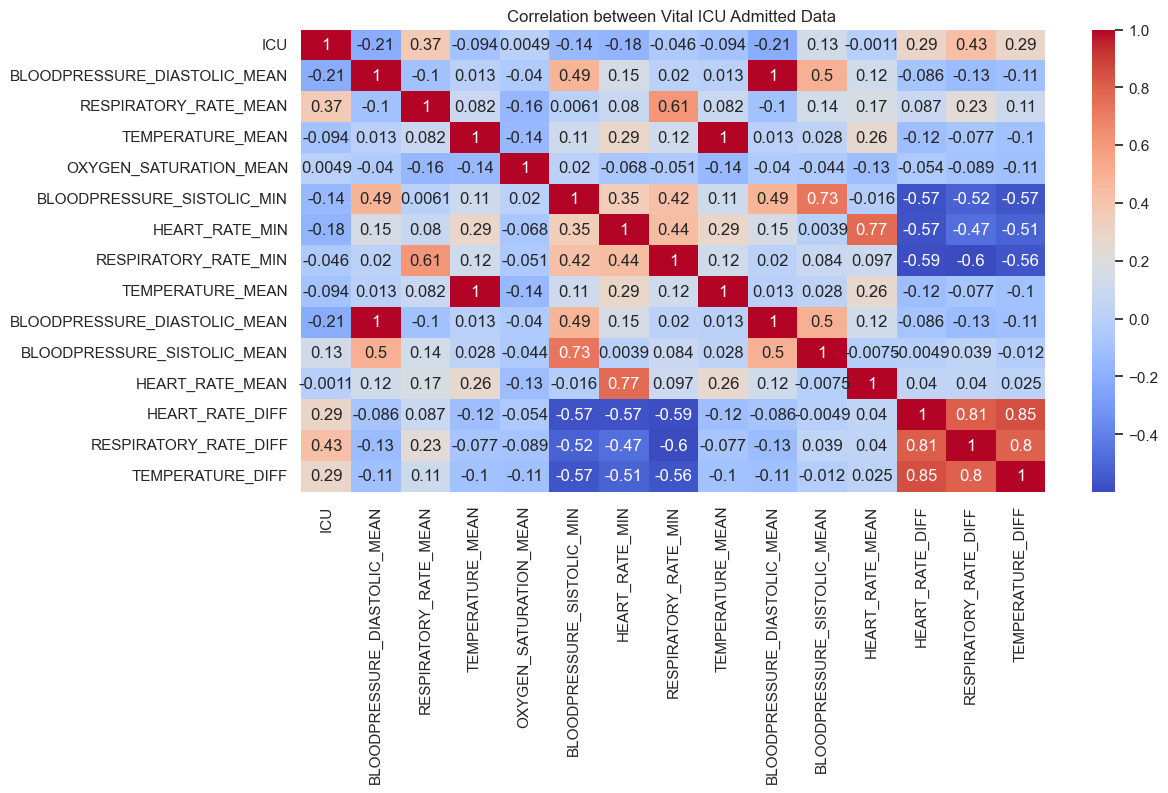

In [201]:
# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Vital ICU Admitted Data ')
plt.show()


## feature selection based on the EDA performed above and splitting data to train and test for model fitting

In [203]:
from sklearn.model_selection import train_test_split 
# Split the data into features (X) and target variable (y)
X = data[[ "AGE_ABOVE65","WINDOW_0-2","DISEASE GROUPING 5", "GENDER","PATIENT_VISIT_IDENTIFIER","RESPIRATORY_RATE_DIFF",
          "BLOODPRESSURE_SISTOLIC_MEAN","HEART_RATE_DIFF","OXYGEN_SATURATION_MEAN","TEMPERATURE_MEAN",
          "LACTATE_MEAN","PLATELETS_MEAN","SAT02_VENOUS_MEAN","HTN"]] 
y = data["ICU"]  # Replace "ICU_admission" with the actual column name of the target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## model training and evaluation

In [204]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix
import shap

# Create an SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.7145328719723183
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC score: 0.5


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [205]:
# ploting confusion matrix to see if the lack of positive testing has impacted the model
confusion_matrix = (classification_report(y_test, y_pred))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       413
           1       0.00      0.00      0.00       165

    accuracy                           0.71       578
   macro avg       0.36      0.50      0.42       578
weighted avg       0.51      0.71      0.60       578



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,  f1_score,  classification_report, confusion_matrix

# Create an instance of DecisionTreeClassifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.7577854671280276
Precision: 0.5722543352601156
Recall: 0.6
F1 score: 0.5857988165680473
ROC AUC score: 0.710411622276029


In [207]:
# ploting confusion matrix to see if the lack of positive testing has impacted the model
confusion_matrix = (classification_report(y_test,y_pred))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       413
           1       0.57      0.60      0.59       165

    accuracy                           0.76       578
   macro avg       0.70      0.71      0.71       578
weighted avg       0.76      0.76      0.76       578



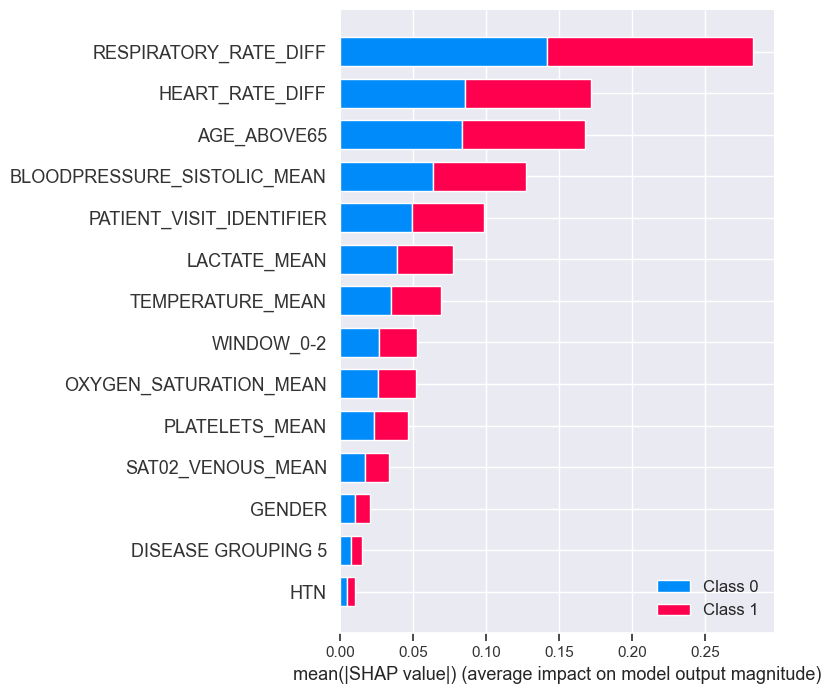

In [208]:
# Create an explainer object using the trained model
explainer = shap.Explainer(model)

# Calculate SHAP values for all features in the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

In [209]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.8148788927335641
Precision: 0.7589285714285714
Recall: 0.5151515151515151
F1 score: 0.6137184115523466
ROC AUC score: 0.7248881062440384


In [210]:
# ploting confusion matrix to see if the lack of positive testing has impacted the model
confusion_matrix = (classification_report(y_test,y_pred))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       413
           1       0.76      0.52      0.61       165

    accuracy                           0.81       578
   macro avg       0.79      0.72      0.75       578
weighted avg       0.81      0.81      0.80       578



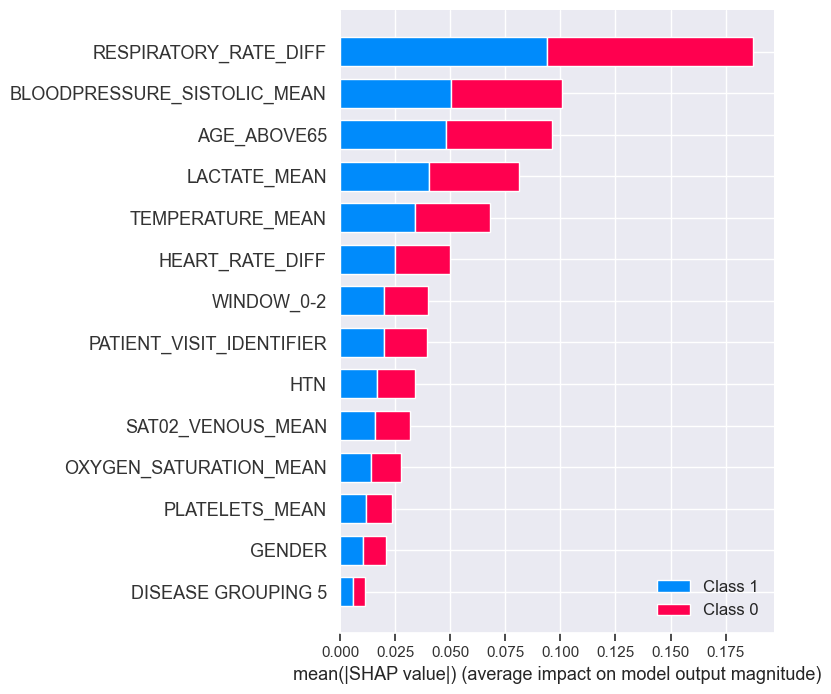

In [211]:
# Create an explainer object using the trained model
explainer = shap.Explainer(model)

# Calculate SHAP values for all features in the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

In [212]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.8148788927335641
Precision: 0.8536585365853658
Recall: 0.42424242424242425
F1 score: 0.5668016194331984
ROC AUC score: 0.6975933670848926


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [213]:
# ploting confusion matrix to see if the lack of positive testing has impacted the model
confusion_matrix = (classification_report(y_test,y_pred))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       413
           1       0.85      0.42      0.57       165

    accuracy                           0.81       578
   macro avg       0.83      0.70      0.72       578
weighted avg       0.82      0.81      0.79       578



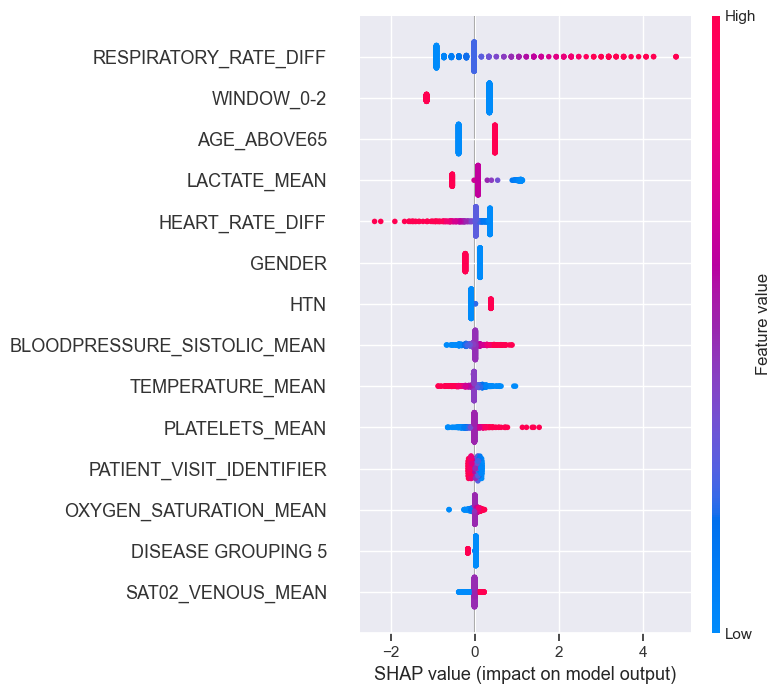

In [214]:
# Initialize the SHAP explainer with the trained model and feature names
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for all features in the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [215]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix

# Create an instance of LightGBM classifier
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)



Accuracy: 0.8442906574394463
Precision: 0.8099173553719008
Recall: 0.593939393939394
F1 score: 0.6853146853146853
ROC AUC score: 0.7691246606500843


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


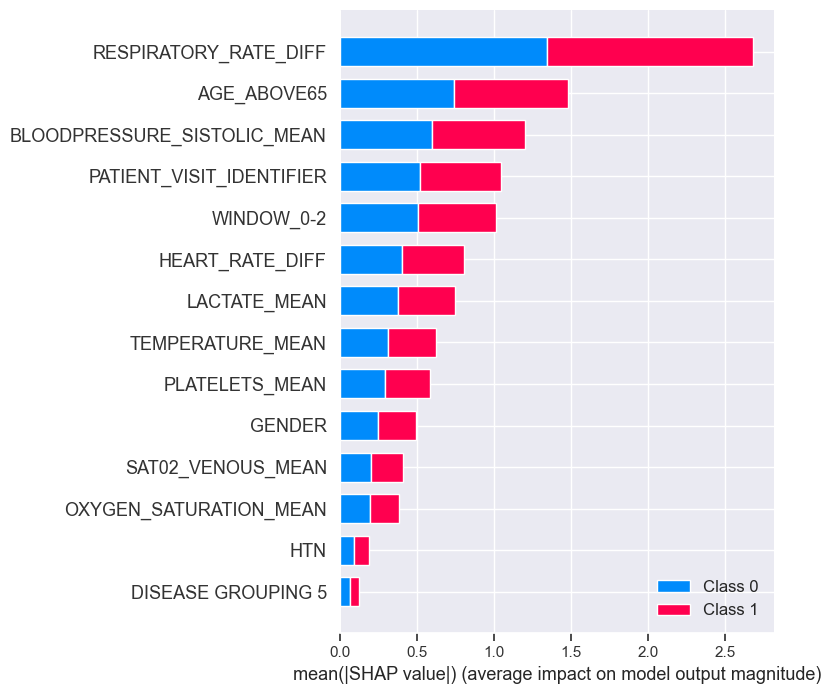

In [216]:
# Create an explainer object using the trained model
explainer = shap.Explainer(model)

# Calculate SHAP values for all features in the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

## evaluating cross validation score to find the model with the highest accuracy

In [221]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = [DecisionTreeClassifier(), SVC(), RandomForestClassifier(),LogisticRegression(),lgb.LGBMClassifier()]
scoring = 'accuracy'  # Choose the evaluation metric, e.g., accuracy, precision, recall, f1_score
# Define the scoring metrics
print(scoring)

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    print(f"{model.__class__.__name__} scores: {scores}")
    print(f"{model.__class__.__name__} mean score: {scores.mean()}")
    print(f"{model.__class__.__name__} standard deviation: {scores.std()}")

accuracy
DecisionTreeClassifier scores: [0.67272727 0.7012987  0.73246753 0.73246753 0.75324675]
DecisionTreeClassifier mean score: 0.7184415584415584
DecisionTreeClassifier standard deviation: 0.028243692922739098
SVC scores: [0.73246753 0.73246753 0.73246753 0.73246753 0.73246753]
SVC mean score: 0.7324675324675325
SVC standard deviation: 0.0
RandomForestClassifier scores: [0.80519481 0.81558442 0.82337662 0.82077922 0.83636364]
RandomForestClassifier mean score: 0.8202597402597401
RandomForestClassifier standard deviation: 0.010179697632345643


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

LogisticRegression scores: [0.8        0.80519481 0.83636364 0.82597403 0.81558442]
LogisticRegression mean score: 0.8166233766233766
LogisticRegression standard deviation: 0.013305193220639657
LGBMClassifier scores: [0.79220779 0.79480519 0.72467532 0.74025974 0.82337662]
LGBMClassifier mean score: 0.775064935064935
LGBMClassifier standard deviation: 0.03679154537065097


In [217]:
models = [DecisionTreeClassifier(), SVC(), RandomForestClassifier(), LogisticRegression(), lgb.LGBMClassifier()]
scoring = 'accuracy'

results = []
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    results.append({
        'Model': model.__class__.__name__,
        'Mean Score': scores.mean(),
        'Standard Deviation': scores.std(),
    })

results_df = pd.DataFrame(results)
print(results_df)



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

                    Model  Mean Score  Standard Deviation
0  DecisionTreeClassifier    0.723117            0.025054
1                     SVC    0.732468            0.000000
2  RandomForestClassifier    0.821299            0.007947
3      LogisticRegression    0.816623            0.013305
4          LGBMClassifier    0.775065            0.036792


In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

models = [DecisionTreeClassifier(), SVC(), RandomForestClassifier(), LogisticRegression(), lgb.LGBMClassifier()]
scoring = 'accuracy'

results = []
for model in models:
    model.fit(X, y)  # Fit the model with your data before using it for cross-validation or accuracy calculation
    scores = cross_val_score(model, X, y, cv=10, scoring=scoring)
    accuracy = accuracy_score(y, model.predict(X))
    results.append({
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Mean Score': scores.mean(),
        'Standard Deviation': scores.std(),
    })

results_df = pd.DataFrame(results)
print(results_df)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

                    Model  Accuracy  Mean Score  Standard Deviation
0  DecisionTreeClassifier  0.998961    0.745558            0.050953
1                     SVC  0.732468    0.732472            0.001903
2  RandomForestClassifier  0.998961    0.818691            0.027651
3      LogisticRegression  0.825974    0.819762            0.016695
4          LGBMClassifier  0.980779    0.774023            0.053867


0    0.745558
1    0.732472
2    0.818691
3    0.819762
4    0.774023
Name: Mean Score, dtype: float64


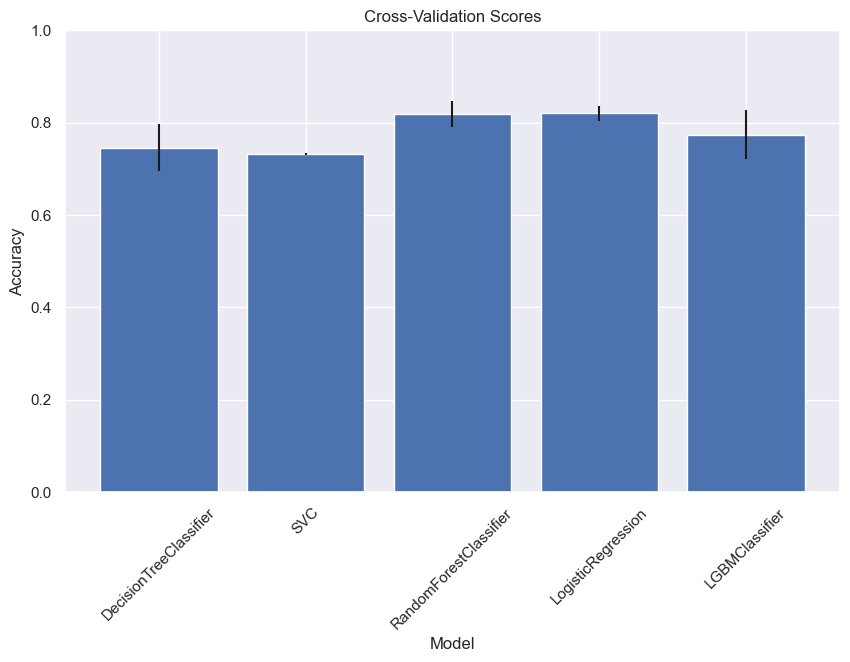

In [226]:
# Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Mean Score'], yerr=results_df['Standard Deviation'])
print(results_df['Mean Score'])
plt.title('Cross-Validation Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

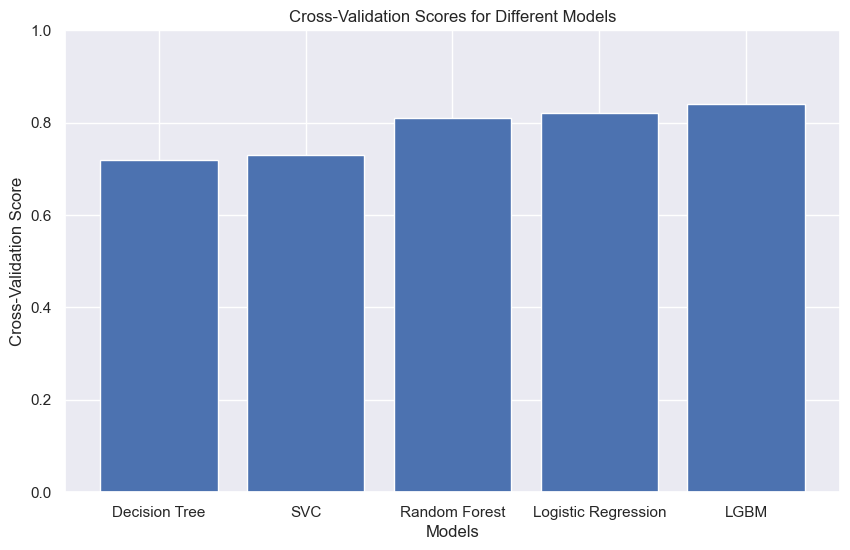

In [218]:
# Define the models and their scores
models = ['Decision Tree', 'SVC', 'Random Forest', 'Logistic Regression', 'LGBM']
scores = [0.72, 0.73, 0.81, 0.82, 0.84]

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Different Models')
plt.ylim([0, 1])  # Set the y-axis limits

# Save the plot as a PNG image
plt.savefig('cross_val_scores.png', dpi=300)  # Specify the filename and DPI

# Show the plot
plt.show()
